# 로지스틱회귀분석_이진분류

In [4]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd

fish2 = pd.read_csv('fish2.csv',
                       encoding='cp949')
fish2.head()

,종류,무게
0,도미,430
1,도미,450
2,도미,500
3,도미,390
4,도미,450


In [5]:
#Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

data = fish2[['무게']]
target = fish2['종류']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=40)

In [16]:
#Step 3. 학습 후 모델을 생성하고 예측을 수행합니다
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀분석 모델 생성
lr = LogisticRegression()

# 학습
lr.fit(X_train, y_train)

# 예측
print(y_test.to_numpy())
lr.predict(X_test)

['잉어' '도미' '잉어' '잉어' '도미' '도미' '도미' '도미' '도미' '도미']


array(['잉어', '도미', '잉어', '잉어', '도미', '도미', '도미', '도미', '도미', '도미'],
      dtype=object)

In [21]:
# 각 항목별 확률값 출력
import numpy as np

print(np.round(lr.predict_proba(X_test),3))

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [11]:
print(lr.predict([[400]]))

['도미']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
print(lr.predict([[200]]))

['잉어']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# 로지스틱회귀분석_다중분류

In [23]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd

#pd.read_csv로 csv파일 불러오기
fish3 = pd.read_csv('fish3.csv',
                       encoding='cp949')
fish3.head()

,종류,무게,길이,높이,두께
0,도미,242.0,25.4,11.5200,4.0200
1,도미,290.0,26.3,12.4800,4.3056
2,도미,340.0,26.5,12.3778,4.6961
3,도미,363.0,29.0,12.7300,4.4555
4,도미,430.0,29.0,12.4440,5.1340


In [24]:
#Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split
# 무게, 길이, 높이, 두께에 따른 종류 분류

data = fish3[['무게','길이','높이','두께']]
target = fish3['종류']

# train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=40)

In [25]:
#Step 3. 데이터 표준화를 진행합니다
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train, y_train)

st_X_train = ss.transform(X_train)
st_X_test = ss.transform(X_test)

In [26]:
# 모델을 생성하고 테스트하고 성능을 확인합니다.
from sklearn.linear_model import LogisticRegression
import numpy as np

# 로지스틱 회귀 모델 생성(C, max_iter 속성 정하기)
softmax_reg = LogisticRegression(C=5, max_iter=200)

# 모델 학습
softmax_reg.fit(st_X_train,y_train)

# 모델 예측 결과 출력
print(softmax_reg.predict(st_X_test))

# 분류 확률 출력
print(np.round(softmax_reg.predict_proba(st_X_test),3))

# 점수 출력
print(softmax_reg.score(st_X_test, y_test))

['잉어' '농어' '농어' '농어' '농어' '빙어' '농어' '빙어' '잉어' '도미' '빙어' '강꼬치고기' '농어' '농어'
 '농어' '농어' '농어' '강꼬치고기' '강꼬치고기' '도미' '농어' '도미' '강꼬치고기' '농어' '도미' '잉어' '농어'
 '도미' '도미' '강꼬치고기']
[[0.004 0.408 0.003 0.148 0.021 0.417]
 [0.012 0.538 0.004 0.034 0.03  0.381]
 [0.01  0.482 0.007 0.02  0.037 0.444]
 [0.016 0.652 0.004 0.006 0.035 0.287]
 [0.04  0.844 0.016 0.    0.094 0.006]
 [0.002 0.179 0.001 0.627 0.006 0.185]
 [0.021 0.65  0.008 0.002 0.047 0.273]
 [0.    0.01  0.    0.982 0.    0.008]
 [0.016 0.388 0.045 0.001 0.082 0.468]
 [0.    0.    0.979 0.    0.011 0.009]
 [0.    0.027 0.    0.95  0.    0.023]
 [0.971 0.027 0.    0.    0.001 0.   ]
 [0.004 0.892 0.012 0.    0.09  0.002]
 [0.015 0.623 0.006 0.005 0.04  0.31 ]
 [0.013 0.465 0.021 0.003 0.062 0.436]
 [0.011 0.583 0.044 0.    0.106 0.256]
 [0.049 0.799 0.008 0.    0.056 0.088]
 [0.939 0.059 0.    0.    0.001 0.   ]
 [0.585 0.392 0.    0.    0.009 0.014]
 [0.    0.001 0.978 0.    0.017 0.004]
 [0.003 0.957 0.002 0.    0.037 0.001]
 [0.    0.  

# KNN_생선분류하기

In [27]:
#Step 1. 구글 코랩에 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

In [37]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd
#pd.read_csv로 csv파일 불러오기
fish = pd.read_csv('fish1.csv',
                       encoding='cp949')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [36]:
# 생성 데이터 프레임에서, 도미와 방어의 데이터로 분리 ( df.loc 추천 )
# 도미 : Species가 Bream인 행
# 두께 : Width
# 무게 : Weight
도미_두께 = fish[fish['Species']=='Bream']['Width']
도미_무게 = fish[fish['Species']=='Bream']['Weight']
print('도미수:',len(도미_두께))

빙어_두께 = fish[fish['Species']=='Smelt']['Width']
빙어_무게 = fish[fish['Species']=='Smelt']['Weight']
print('빙어수:',len(빙어_두께))


도미수: 35
빙어수: 14


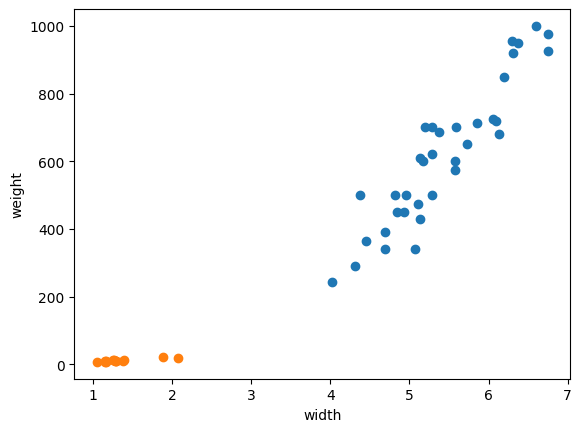

In [39]:
import matplotlib.pyplot as plt

# 도미와 방어의 두께, 무게 산점도 그리기
plt.scatter(도미_두께, 도미_무게)
plt.scatter(빙어_두께, 빙어_무게)
plt.xlabel('width')
plt.ylabel('weight')
plt.show()

In [40]:
import numpy as np

# 가로로 나열되어 있는 Weight와 Width 세로로 합쳐서 data 만들기
data = fish[['Weight','Width']]

# 물고기 종류로 target 만들기
target = fish['Species']

In [43]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=40)

In [48]:
# KNN 라이브러리 Import
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)

# KNN 모델 학습
knn.fit(X_train, y_train)

# score 출력
knn.score(X_test, y_test)

1.0

In [50]:
# 데이터 넣어서 결과 확인 : ['Smelt']
print(knn.predict([[25, 1.5]]))

['Smelt']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [51]:
# 데이터 넣어서 결과 확인 : ['Bream']
print(knn.predict([[250, 5.1]]))

['Bream']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# 다이아몬드 가격예측

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [53]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [56]:
df = df.drop(["Unnamed: 0"],axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [58]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

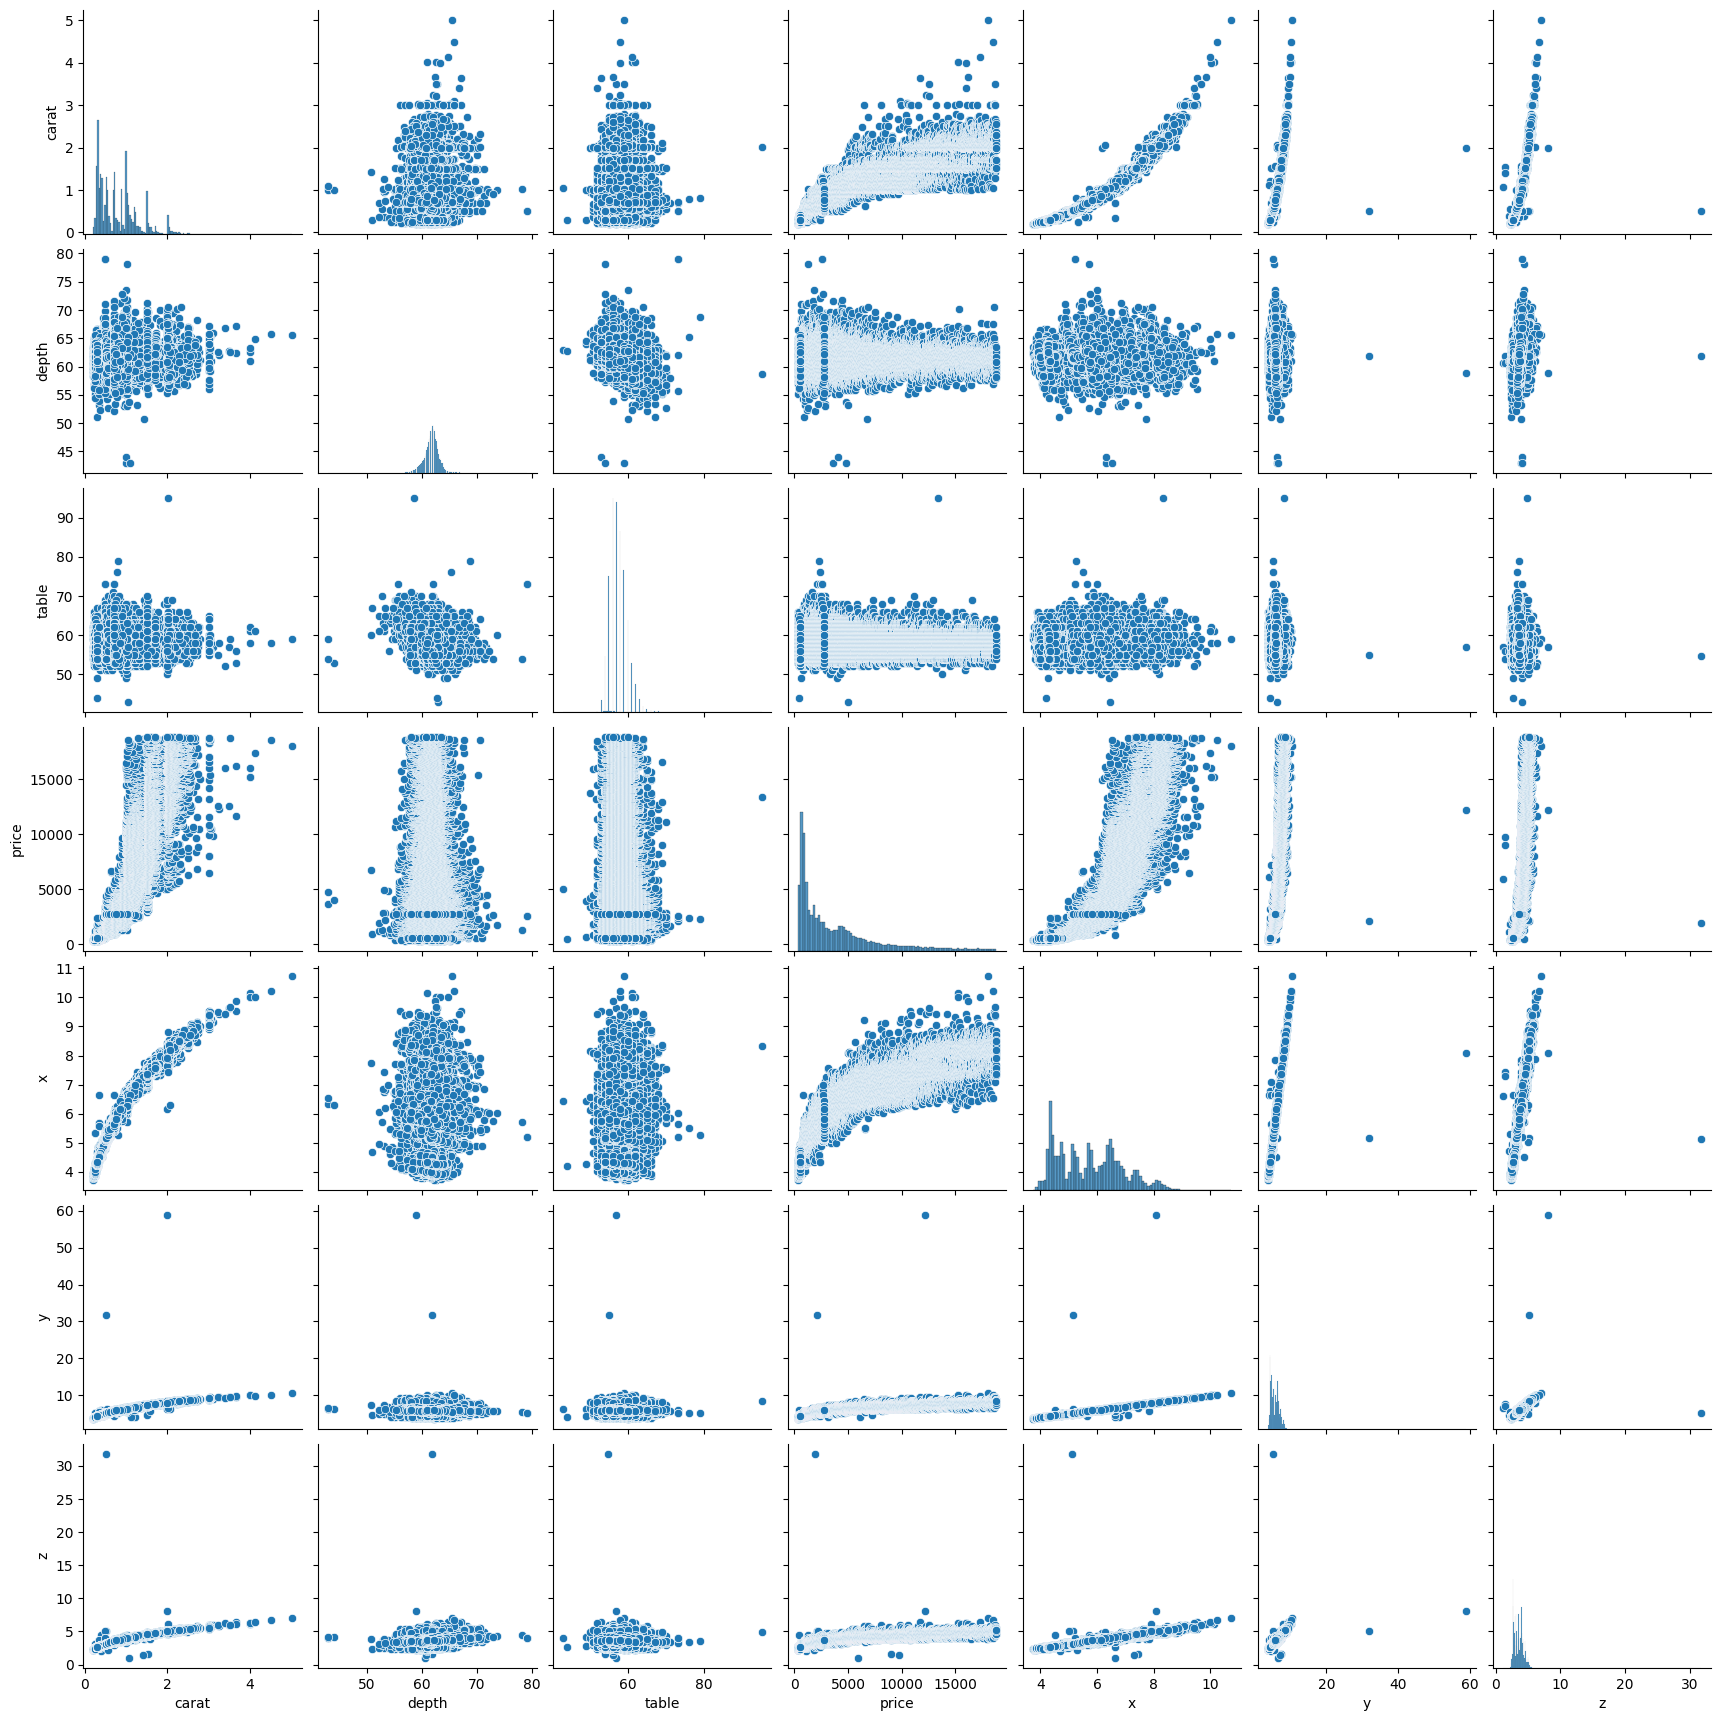

In [59]:
sns.pairplot(df)

In [60]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-pack

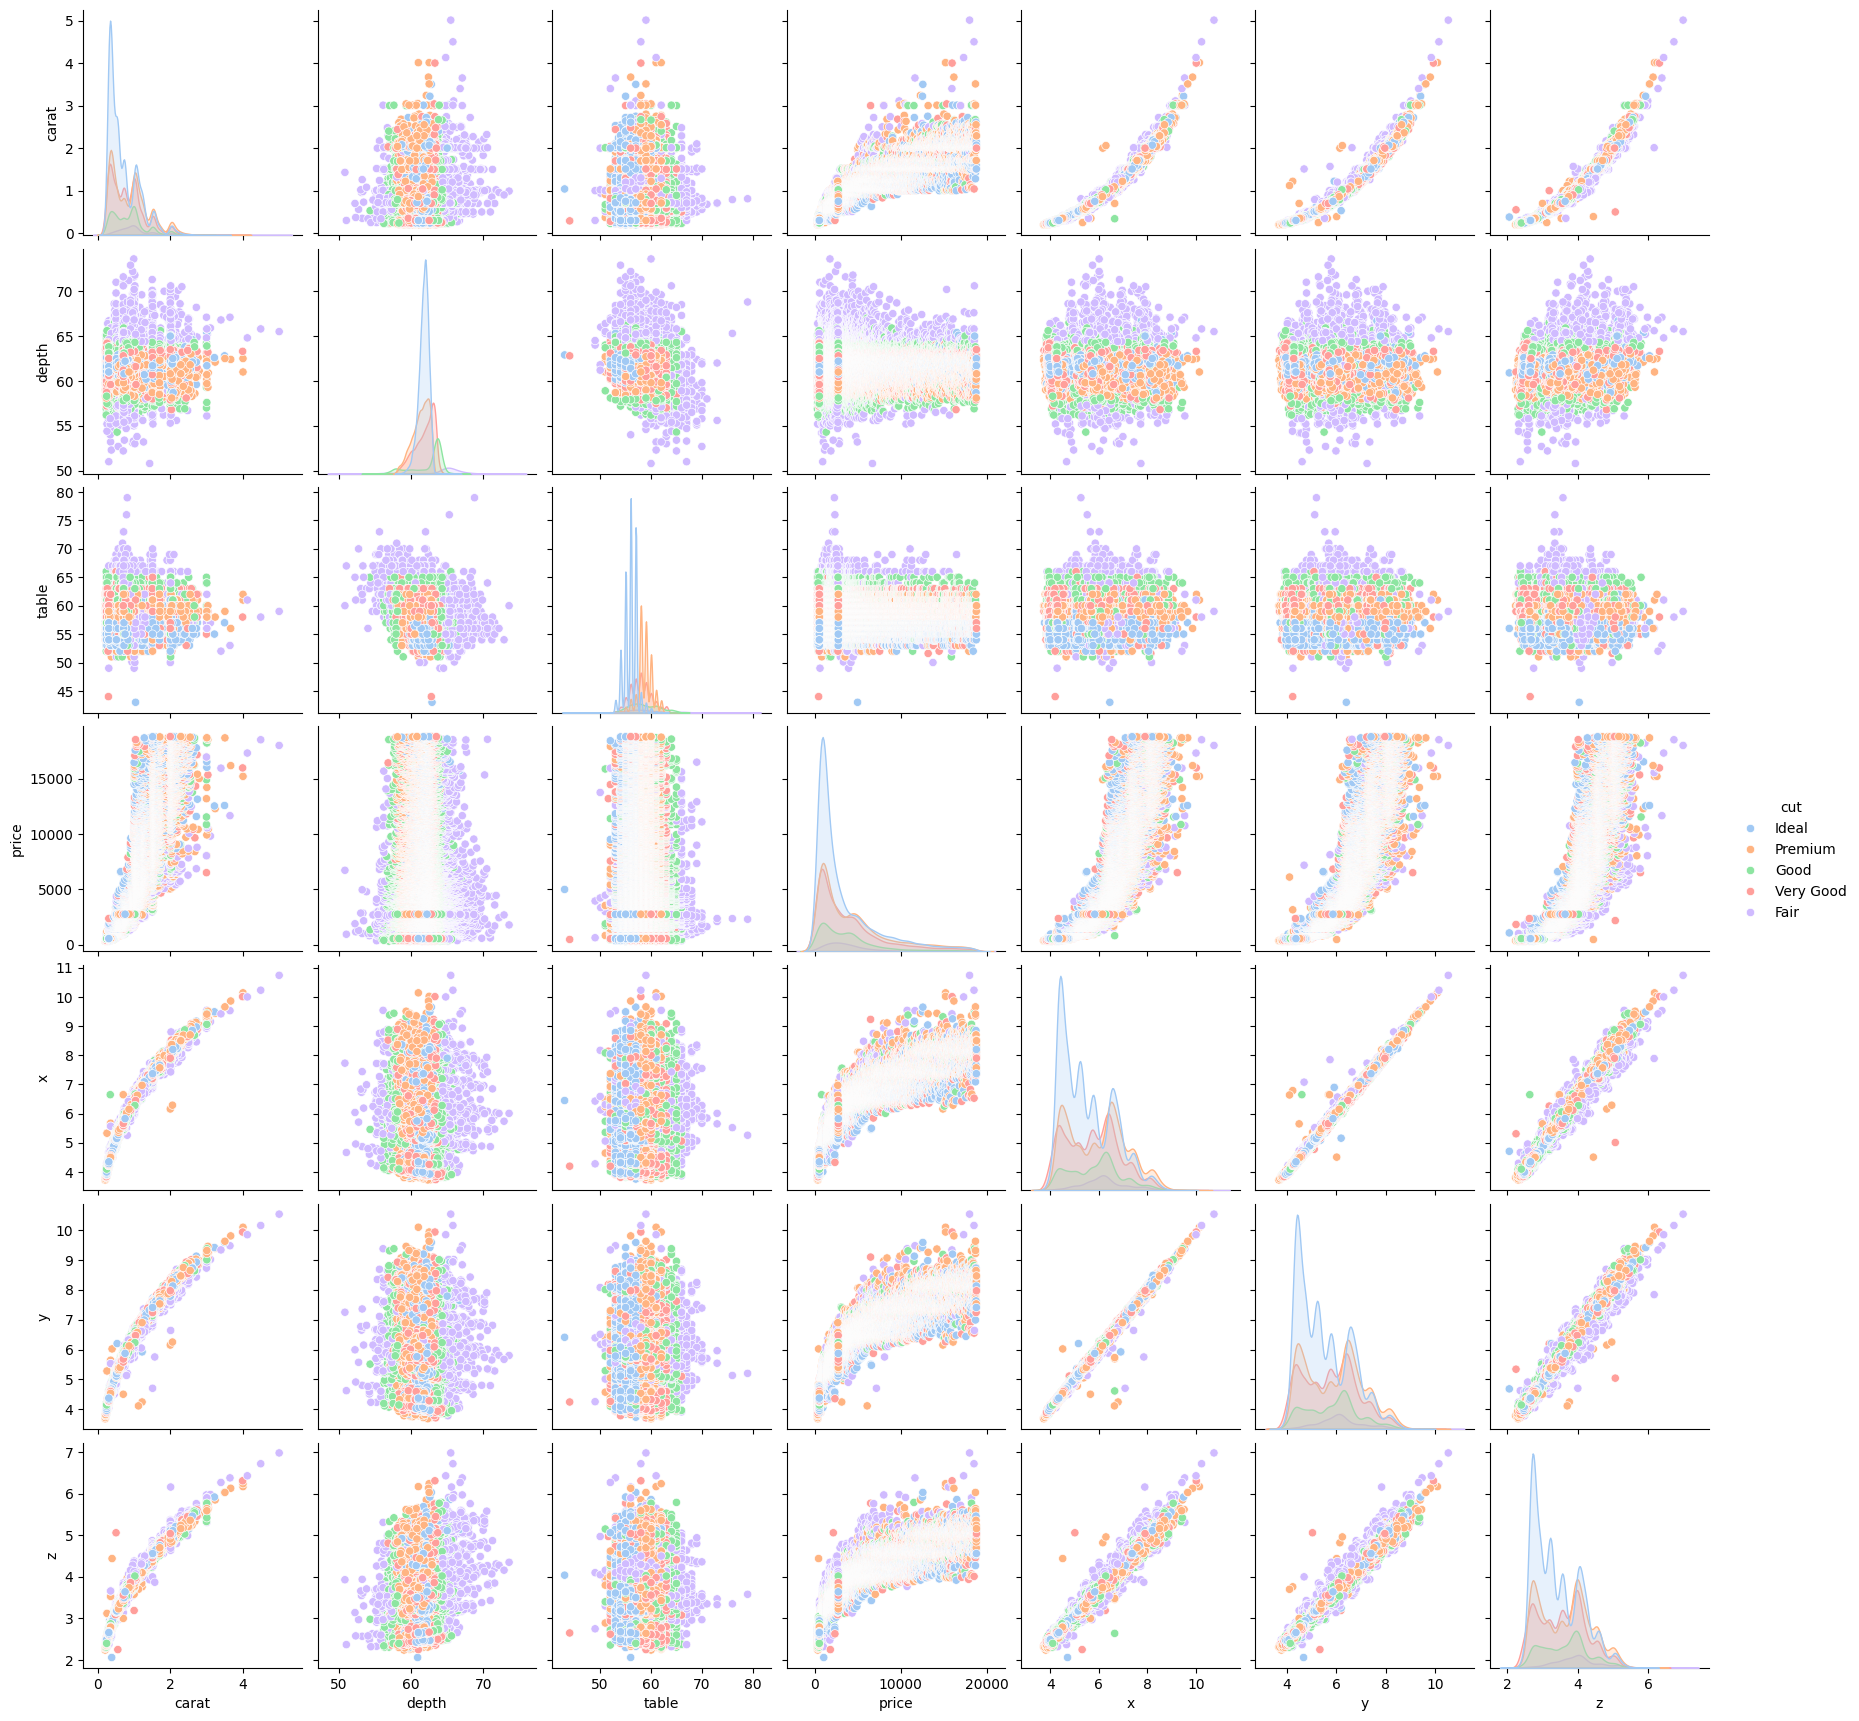

In [66]:
shade = sns.color_palette("pastel")
ax=sns.pairplot(df, hue="cut",palette=shade)
plt.show()

In [68]:
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


<Axes: xlabel='cut', ylabel='price'>

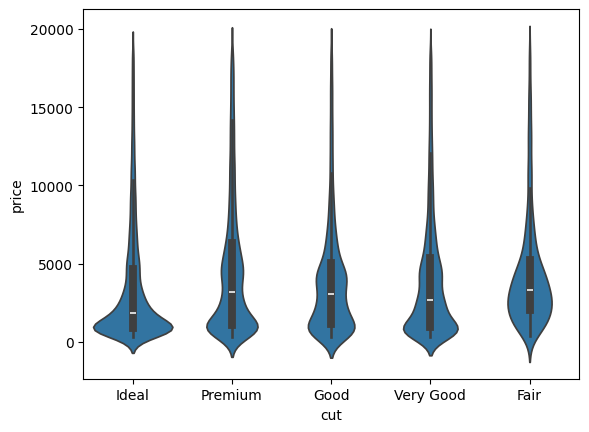

In [72]:
sns.violinplot(x="cut", y="price", data=df)

<Axes: xlabel='color', ylabel='price'>

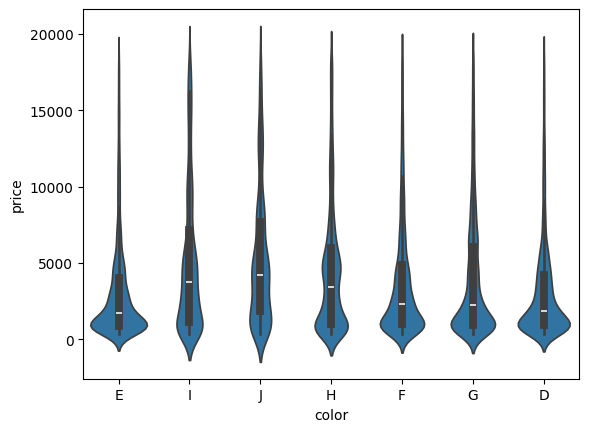

In [73]:
sns.violinplot(x="color", y="price", data=df)

<Axes: xlabel='clarity', ylabel='price'>

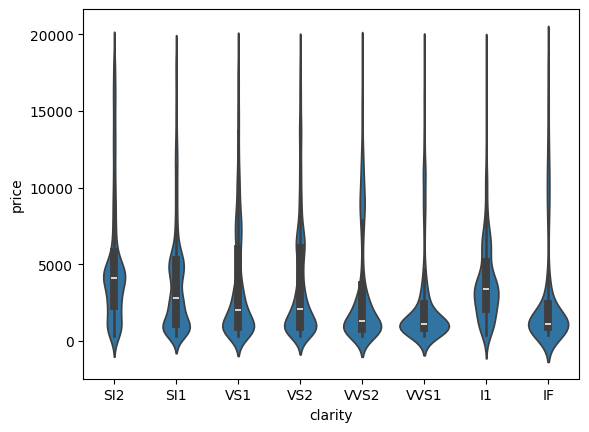

In [74]:
sns.violinplot(x="clarity", y="price", data=df)

In [75]:
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [77]:
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

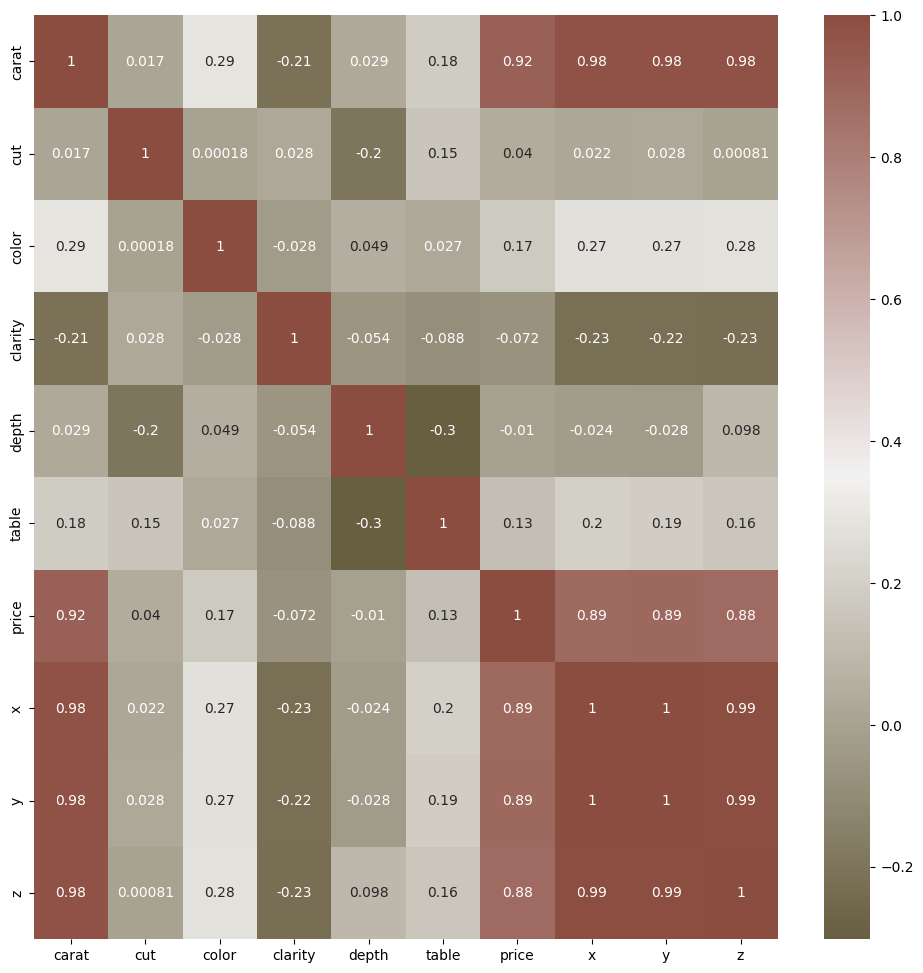

In [78]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [79]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [80]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [81]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -748.883395 
RandomForest: -546.411886 
KNeighbors: -823.648809 
XGBRegressor: -547.645093 


In [82]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [83]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9803842902183533
Adjusted R^2: 0.9803711810338256
MAE: 280.17333984375
MSE: 307728.1875
RMSE: 554.7325369040472
